# Домашнее задание по теме: Кластеризация

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [32]:
!conda install matplotlib numpy scikit-learn seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



In [33]:
 !conda install -c conda-forge umap-learn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\skovalchuk\Anaconda3\envs\LevelUP

  added / updated specs:
    - umap-learn


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2021.5.25-~ --> conda-forge::ca-certificates-2021.5.30-h5b45459_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main::certifi-2021.5.30-py39haa9~ --> conda-forge::certifi-2021.5.30-py39hcbf5309_0
  openssl              pkgs/main::openssl-1.1.1k-h2bbff1b_0 --> conda-forge::openssl-1.1.1k-h8ffe710_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [1]:
# ipympl + widget включает интерактивные функции matplotlib

!conda install ipympl -y
!conda install -c conda-forge nodejs -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\skovalchuk\Anaconda3\envs\LevelUP

  added / updated specs:
    - nodejs


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2021.5.25-~ --> conda-forge::ca-certificates-2021.5.30-h5b45459_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main::certifi-2021.5.30-py39haa9~ --> conda-forge::certifi-2021.5.30-py39hcbf5309_0
  openssl              pkgs/main::openssl-1.1.1k-h2bbff1b_0 --> conda-forge::openssl-1.1.1k-h8ffe710_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import numpy as np
import pandas as pd

from umap import UMAP
from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### Загрузка данных

[Источник (Medical Cost Personal Datasets)](https://www.kaggle.com/mirichoi0218/insurance)

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Анализ данных

### Типы данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Пропущенные значения

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Распределение данных

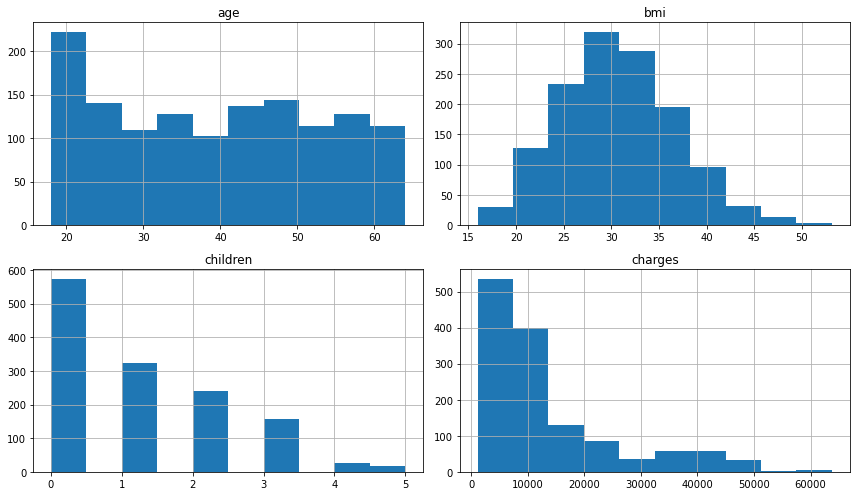

In [6]:
df.hist(figsize=(12, 7))
plt.tight_layout()

## Подготовка

#### Категориальные признаки

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['southwest', 'northwest', 'southeast', 'northeast'],['female','male'],['no','yes']])
df[['region_enc','sex_enc','smoker_enc']] = ord_enc.fit_transform(df[['region','sex','smoker']])
df_enc = df.drop(['region','sex','smoker'], 1)
df_enc

,age,bmi,children,charges,region_enc,sex_enc,smoker_enc
0,19,27.900,0,16884.92400,0.0,0.0,1.0
1,18,33.770,1,1725.55230,2.0,1.0,0.0
2,28,33.000,3,4449.46200,2.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,1.0,0.0
4,32,28.880,0,3866.85520,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,1.0,0.0
1334,18,31.920,0,2205.98080,3.0,0.0,0.0
1335,18,36.850,0,1629.83350,2.0,0.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0


### Масштабирование

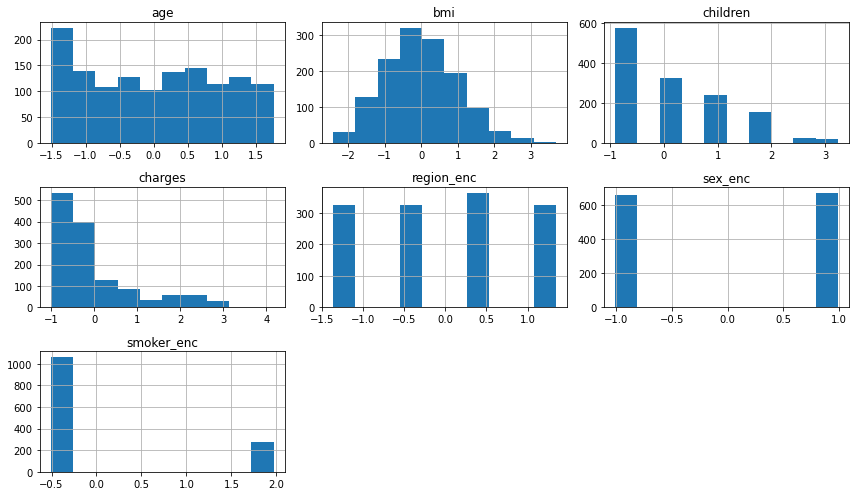

In [8]:
df_norm = pd.DataFrame(StandardScaler().fit_transform(df_enc), columns=df_enc.columns)
df_norm.hist(figsize=(12, 7))
plt.tight_layout()

### Полезные функции / переменные

#### Colormap

In [9]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# можно заменить на любые цвета (и любое нужно количество)
# см. список цветов https://matplotlib.org/stable/gallery/color/named_colors.html
# или любой RGB

cmap_3 = ListedColormap(['fuchsia', 
                         'lime', 
                         'blue'])

cmap_4 = ListedColormap(['fuchsia',
                         'chocolate',
                         'lime', 
                         'blue'])

cmap_5 = ListedColormap(['black',
                         'fuchsia',
                         'chocolate',
                         'lime', 
                         'blue'])

cmap_7 = ListedColormap(['black', 
                         'chocolate', 
                         'fuchsia', 
                         'blue',
                         'lime', 
                         'aqua', 
                         'crimson'])

cmap_22 = ListedColormap(['black',          # 1
                          'chocolate',      # 2
                          'fuchsia',        # 3
                          'blue',           # 4
                          'lime',           # 5
                          'aqua',           # 6
                          'crimson',        # 7
                          'darkorange',     # 8
                          'deeppink',       # 9
                          'dodgerblue',     # 10
                          'darkolivegreen', # 11
                          'blueviolet',     # 12
                          'olive',          # 13
                          'tomato',         # 14
                          'purple',         # 15
                          'yellow',         # 16
                          'gold',           # 17
                          'darkgreen',      # 18
                          'teal',           # 19
                          'maroon',         # 20
                          'slategray',      # 21
                          'darkslategray']) # 22

#### Scree plot

In [10]:
def explained_variance_plot(pca_obj):
    features = range(pca_obj.n_components_)
    cumulative_sum = np.cumsum(pca_obj.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)

    plt.bar(features, pca_obj.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')

    plt.legend(loc='best')
    plt.tight_layout()

#### Функция оценки силуэта

In [11]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

def silhouette_plot(X, labels):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # 1-й подзаголовок - это силуэтный график
    # Коэффициент силуэта может варьироваться в пределах [-1, 1], 
    # но в этом примере все лежат в пределах [-0.1, 1]
    ax.set_xlim([-0.1, 1])

    # (n_clusters+1)*10 предназначен для вставки пустого пространства 
    # между силуэтами отдельных кластеров, чтобы четко их разграничить
    n_clusters = len(set(labels))
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # silhouette_score дает среднее значение для всех выборок
    # это дает представление о плотности и разделении сформированных кластеров
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        # агрегация оценок силуэта для выборок, принадлежащих
        # кластеру  i и их сортировка
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # обозначить участки силуэта номерами кластеров в середине
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # вычислить новый y_lower для следующего участка
        y_lower = y_upper + 10  # 10 для 0 выборки

    ax.set_title("The silhouette plot for the various clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # вертикальная линия для средней оценки силуэта всех значений
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # метки осей
    ax.set_yticks([])  
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## Визуализация данных

### N-D PCA

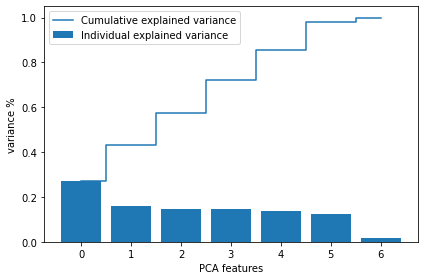

In [12]:
pca = PCA()
pca.fit(df_norm)
explained_variance_plot(pca)

### 3-D PCA

In [15]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-155, elev=45)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
%matplotlib inline

### 3-D UMAP

In [14]:
umap_3 = UMAP(n_components=3)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=25, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
%matplotlib inline

## K-means

### Выбор `n_clusters`

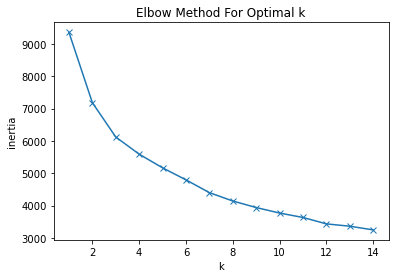

In [16]:
inertias = []
Ks = range(1, 15)
for k in Ks:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    inertias.append(km.inertia_)

inertias

plt.plot(Ks, inertias, 'x-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### Построение модели

In [17]:
k_means_4 = KMeans(init="k-means++", n_clusters=4, n_init = 12)
k_means_4.fit(df_norm)

n_clusters_4 = k_means_4.n_clusters

labels_4 = k_means_4.labels_
labels_4

array([2, 3, 0, ..., 3, 3, 2])

### Анализ результатов

For n_clusters = 4 The average silhouette_score is : 0.18471307304740214


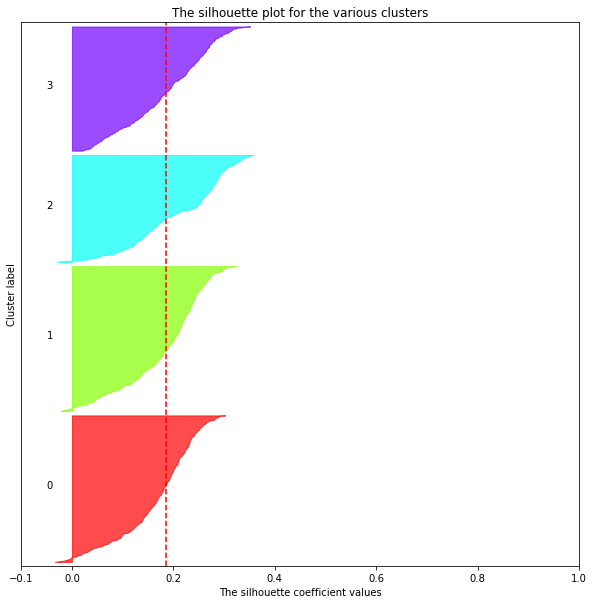

In [18]:
silhouette_plot(df_norm, labels_4)

### Оценка силуэта (Silhouette Score)

Типичные графики силуэта представляют метку кластера на оси y, а фактический показатель силуэта — на оси x.

Silhouette Score отображает меру того, **насколько близко каждая точка в кластере находится к точкам в соседних кластерах.**

**Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.**

**Размер/толщина силуэтов также пропорциональны количеству образцов внутри этого кластера.**

Чем выше коэффициенты силуэта (чем ближе к +1), тем дальше образцы кластера находятся от образцов соседних кластеров.

Значение 0 указывает, что образец находится на границе принятия решения между двумя соседними кластерами или очень близко к ней.

Отрицательные значения, напротив, указывают на то, что эти образцы могли быть отнесены к неправильному кластеру.

### 3-D PCA

In [19]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-155, elev=45)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels_4, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
%matplotlib inline

### 3-D UMAP

In [21]:
umap_3 = UMAP(n_components=3)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=142, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels_4, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
%matplotlib inline

### Анализ "представителей" кластеров

In [23]:
df["Cluster_4"] = labels_4
df.groupby('Cluster_4').mean().round(2)
df.groupby('Cluster_4').median().round(2)

clusters = {}

for c in range(n_clusters_4):
    clusters[c] = df[df.Cluster_4 == c]
    display(clusters[c])
    display(clusters[c].describe())
    print('\n', '=' * 100, '\n')

,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4
2,28,male,33.000,3,no,southeast,4449.46200,2.0,1.0,0.0,0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,1.0,0.0,0
8,37,male,29.830,2,no,northeast,6406.41070,3.0,1.0,0.0,0
18,56,male,40.300,0,no,southwest,10602.38500,0.0,1.0,0.0,0
24,37,male,28.025,2,no,northwest,6203.90175,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1322,62,male,38.830,0,no,southeast,12981.34570,2.0,1.0,0.0,0
1325,61,male,33.535,0,no,northeast,13143.33665,3.0,1.0,0.0,0
1327,51,male,30.030,1,no,southeast,9377.90470,2.0,1.0,0.0,0
1329,52,male,38.600,2,no,southwest,10325.20600,0.0,1.0,0.0,0


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.0,375.0,375.0
mean,45.408000,31.601547,1.352000,10038.297794,1.469333,1.0,0.0,0.0
std,11.079752,6.063178,1.291204,5512.782519,1.115517,0.0,0.0,0.0
min,19.000000,16.815000,0.000000,2438.055200,0.000000,1.0,0.0,0.0
25%,37.000000,27.427500,0.000000,6347.173150,0.000000,1.0,0.0,0.0
50%,46.000000,31.350000,1.000000,8964.060550,1.000000,1.0,0.0,0.0
75%,55.000000,35.775000,2.000000,11753.467500,2.000000,1.0,0.0,0.0
max,64.000000,50.380000,5.000000,32108.662820,3.000000,1.0,0.0,0.0


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4
6,46,female,33.440,1,no,southeast,8240.58960,2.0,0.0,0.0,1
7,37,female,27.740,3,no,northwest,7281.50560,1.0,0.0,0.0,1
9,60,female,25.840,0,no,northwest,28923.13692,1.0,0.0,0.0,1
13,56,female,39.820,0,no,southeast,11090.71780,2.0,0.0,0.0,1
16,52,female,30.780,1,no,northeast,10797.33620,3.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1290,38,female,19.950,2,no,northeast,7133.90250,3.0,0.0,0.0,1
1319,39,female,26.315,2,no,northwest,7201.70085,1.0,0.0,0.0,1
1326,42,female,32.870,0,no,northeast,7050.02130,3.0,0.0,0.0,1
1330,57,female,25.740,2,no,southeast,12629.16560,2.0,0.0,0.0,1


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.0,371.0,371.0
mean,47.016173,31.202844,1.401617,10881.370646,1.404313,0.0,0.0,1.0
std,10.476731,5.835486,1.270411,5627.809950,1.126287,0.0,0.0,0.0
min,18.000000,17.290000,0.000000,3410.324000,0.000000,0.0,0.0,1.0
25%,39.500000,27.232500,0.000000,7236.014625,0.000000,0.0,0.0,1.0
50%,48.000000,31.000000,1.000000,9861.025000,1.000000,0.0,0.0,1.0
75%,55.500000,35.150000,2.000000,12607.357000,2.000000,0.0,0.0,1.0
max,64.000000,48.070000,5.000000,36910.608030,3.000000,0.0,0.0,1.0


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,1.0,2
11,62,female,26.290,0,yes,southeast,27808.72510,2.0,0.0,1.0,2
14,27,male,42.130,0,yes,southeast,39611.75770,2.0,1.0,1.0,2
19,30,male,35.300,0,yes,southwest,36837.46700,0.0,1.0,1.0,2
23,34,female,31.920,1,yes,northeast,37701.87680,3.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,0.0,0.0,1.0,2
1314,30,female,23.655,3,yes,northwest,18765.87545,1.0,0.0,1.0,2
1321,62,male,26.695,0,yes,northeast,28101.33305,3.0,1.0,1.0,2
1323,42,female,40.370,2,yes,southeast,43896.37630,2.0,0.0,1.0,2


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.0,274.0
mean,38.514599,30.708449,1.113139,32050.231832,1.609489,0.580292,1.0,2.0
std,13.923186,6.318644,1.157066,11541.547176,1.074539,0.494414,0.0,0.0
min,18.000000,17.195000,0.000000,12829.455100,0.000000,0.000000,1.0,2.0
25%,27.000000,26.083750,0.000000,20826.244213,1.000000,0.000000,1.0,2.0
50%,38.000000,30.447500,1.000000,34456.348450,2.000000,1.000000,1.0,2.0
75%,49.000000,35.200000,2.000000,41019.207275,2.000000,1.000000,1.0,2.0
max,64.000000,52.580000,5.000000,63770.428010,3.000000,1.000000,1.0,2.0


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4
1,18,male,33.770,1,no,southeast,1725.55230,2.0,1.0,0.0,3
4,32,male,28.880,0,no,northwest,3866.85520,1.0,1.0,0.0,3
5,31,female,25.740,0,no,southeast,3756.62160,2.0,0.0,0.0,3
10,25,male,26.220,0,no,northeast,2721.32080,3.0,1.0,0.0,3
12,23,male,34.400,0,no,southwest,1826.84300,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424,3.0,0.0,0.0,3
1331,23,female,33.400,0,no,southwest,10795.93733,0.0,0.0,0.0,3
1334,18,female,31.920,0,no,northeast,2205.98080,3.0,0.0,0.0,3
1335,18,female,36.850,0,no,southeast,1629.83350,2.0,0.0,0.0,3


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.0,318.0
mean,23.380503,28.888915,0.418239,3687.771342,1.610063,0.446541,0.0,3.0
std,4.912791,5.899290,0.691029,3872.186002,1.082770,0.497917,0.0,0.0
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.0,3.0
25%,19.000000,24.510000,0.000000,1886.954813,1.000000,0.000000,0.0,3.0
50%,22.000000,28.802500,0.000000,2641.155700,2.000000,0.000000,0.0,3.0
75%,27.000000,33.000000,1.000000,3751.582375,3.000000,1.000000,0.0,3.0
max,36.000000,53.130000,3.000000,25081.767840,3.000000,1.000000,0.0,3.0


### <Проверка гипотез / Дополнительные графики / Выводы>

Этот раздел необходимо назвать самостоятельно.

Можно разделить на несколько разделов. 

Написать выводы, идеи и т.п., чтобы было понятно, что пытались проанализировать кластеры.

In [ ]:
Основным признаком разделения стал пол и курит/не курит.

Первый кластер: Не курящие мужчины.
Второй кластер: Не курящие женщины.    
Третий кластер: Все Курящие.
Четвертый кластер: Все не курящие.
    
Интересно, что в отличие от ДБ скана 3 и 4 кластер не смогли разделиться по полу. При этом 4 кластер вообще сборная солянка всего и сильно пересекается с 1 и 2 кластером (по признаку не курящих)

## DBSCAN

ВНИМАНИЕ: нормально, если получится много кластеров (~20), можно попробовать сделать меньше, провести различные эксперименты с `min_samples` и `eps`.

### Выбор `min_samples`

In [24]:
min_samples = len(df_norm.columns) + 1
min_samples

8

### Выбор `eps`

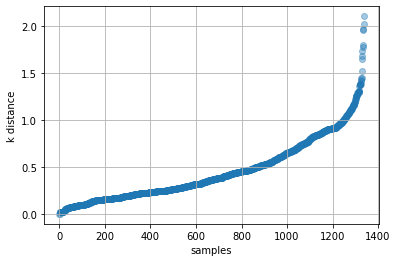

In [25]:
from sklearn.neighbors import NearestNeighbors

# рассчитать среднее расстояние между каждой точкой 
# в наборе данных и ее min_samples ближайшими соседями 
neighbors = NearestNeighbors(n_neighbors=min_samples-1)
neighbors_fit = neighbors.fit(df_norm)
distances, indices = neighbors_fit.kneighbors(df_norm)

distances = np.sort(distances, axis=0)

distances = distances[:, 1]

plt.scatter(x=range(len(df_norm)), y=distances, alpha=0.4)

plt.xlabel('samples')
plt.ylabel('k distance')
plt.grid(True)

In [26]:
epsilon = 1.4

### Построение модели

array([-1,  0,  1,  2,  3], dtype=int64)

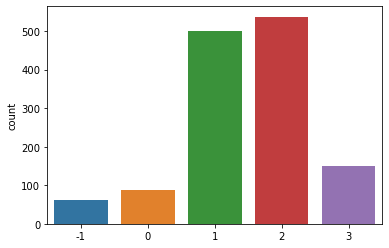

In [27]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df_norm)
labels = db.labels_

sns.countplot(x=labels)

clusters = np.unique(labels)
clusters

### Анализ результатов

In [28]:
df["Cluster_DBSCAN"] = labels
df

,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,1.0,2,0
1,18,male,33.770,1,no,southeast,1725.55230,2.0,1.0,0.0,3,1
2,28,male,33.000,3,no,southeast,4449.46200,2.0,1.0,0.0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1.0,1.0,0.0,0,-1
4,32,male,28.880,0,no,northwest,3866.85520,1.0,1.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,1.0,0.0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,3.0,0.0,0.0,3,2
1335,18,female,36.850,0,no,southeast,1629.83350,2.0,0.0,0.0,3,2
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,3,2


### Оценка силуэта (Silhouette Score)

Типичные графики силуэта представляют метку кластера на оси y, а фактический показатель силуэта — на оси x.

Silhouette Score отображает меру того, **насколько близко каждая точка в кластере находится к точкам в соседних кластерах.**

**Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.**

**Размер/толщина силуэтов также пропорциональны количеству образцов внутри этого кластера.**

Чем выше коэффициенты силуэта (чем ближе к +1), тем дальше образцы кластера находятся от образцов соседних кластеров.

Значение 0 указывает, что образец находится на границе принятия решения между двумя соседними кластерами или очень близко к ней.

Отрицательные значения, напротив, указывают на то, что эти образцы могли быть отнесены к неправильному кластеру.

For n_clusters = 5 The average silhouette_score is : 0.189824540050065


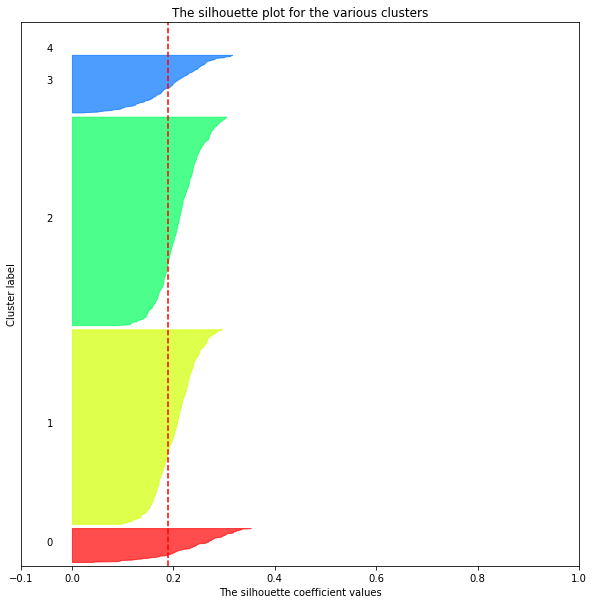

In [29]:
silhouette_plot(df_norm, labels)
cmap = cmap_4

### 3-D PCA

In [30]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [31]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-75, elev=20)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels, 
           alpha=0.4, 
           s=80, 
           cmap=cmap)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
%matplotlib inline

### 3-D UMAP

In [33]:
umap_3 = UMAP(n_components=3, n_neighbors=min_samples)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=142, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels, 
           alpha=0.4, 
           s=80, 
           cmap=cmap)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
%matplotlib inline

### Анализ "представителей" кластеров

In [35]:
df.groupby('Cluster_DBSCAN').mean().round(2)

df_clusters = {}
cluster_examples = pd.DataFrame()

for c in clusters:
    print(f'Cluster_DBSCAN = {c}')
    
    df_c = df[df.Cluster_DBSCAN == c]
    df_clusters[c] = df_c
    
    middle_row_index = int(len(df_c) * 0.75)
    cluster_examples = cluster_examples.append(df_c.iloc[middle_row_index])
    
    display(df_c)
    display(df_c.describe())
    
    print('\n', '=' * 50, '\n')

Cluster_DBSCAN = -1


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
3,33,male,22.705,0,no,northwest,21984.47061,1.0,1.0,0.0,0,-1
39,60,male,39.900,0,yes,southwest,48173.36100,0.0,1.0,1.0,2,-1
62,64,male,24.700,1,no,northwest,30166.61817,1.0,1.0,0.0,0,-1
71,31,male,28.500,5,no,northeast,6799.45800,3.0,1.0,0.0,0,-1
84,37,female,34.800,2,yes,southwest,39836.51900,0.0,0.0,1.0,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,2.0,1.0,1.0,2,-1
1313,19,female,34.700,2,yes,southwest,36397.57600,0.0,0.0,1.0,2,-1
1317,18,male,53.130,0,no,southeast,1163.46270,2.0,1.0,0.0,3,-1
1328,23,female,24.225,2,no,northeast,22395.74424,3.0,0.0,0.0,3,-1


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,38.507937,33.356825,2.079365,32115.512731,1.380952,0.412698,0.587302,1.507937,-1.0
std,14.799600,8.715480,1.462450,15030.538144,1.141993,0.496274,0.496274,0.895743,0.0
min,18.000000,17.290000,0.000000,1163.462700,0.000000,0.000000,0.000000,0.000000,-1.0
25%,24.000000,26.840000,1.000000,22190.107425,0.000000,0.000000,0.000000,1.000000,-1.0
50%,37.000000,33.330000,2.000000,33471.971890,1.000000,0.000000,1.000000,2.000000,-1.0
75%,52.000000,37.905000,3.000000,41886.918800,2.000000,1.000000,1.000000,2.000000,-1.0
max,64.000000,53.130000,5.000000,63770.428010,3.000000,1.000000,1.000000,3.000000,-1.0




Cluster_DBSCAN = 0


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,1.0,2,0
11,62,female,26.290,0,yes,southeast,27808.72510,2.0,0.0,1.0,2,0
23,34,female,31.920,1,yes,northeast,37701.87680,3.0,0.0,1.0,2,0
58,53,female,22.880,1,yes,southeast,23244.79020,2.0,0.0,1.0,2,0
64,20,female,22.420,0,yes,northwest,14711.74380,1.0,0.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1306,29,female,21.850,0,yes,northeast,16115.30450,3.0,0.0,1.0,2,0
1308,25,female,30.200,0,yes,southwest,33900.65300,0.0,0.0,1.0,2,0
1314,30,female,23.655,3,yes,northwest,18765.87545,1.0,0.0,1.0,2,0
1323,42,female,40.370,2,yes,southeast,43896.37630,2.0,0.0,1.0,2,0


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.0,88.0,88.0
mean,38.715909,28.152216,0.704545,27604.961655,1.750000,0.0,1.0,2.0,0.0
std,14.089165,5.666077,0.948793,10571.565918,1.019917,0.0,0.0,0.0,0.0
min,18.000000,17.195000,0.000000,13844.506000,0.000000,0.0,1.0,2.0,0.0
25%,26.750000,23.797500,0.000000,19360.144250,1.000000,0.0,1.0,2.0,0.0
50%,40.000000,27.692500,0.000000,24143.923025,2.000000,0.0,1.0,2.0,0.0
75%,48.250000,31.400000,1.000000,36336.795895,3.000000,0.0,1.0,2.0,0.0
max,64.000000,46.200000,3.000000,55135.402090,3.000000,0.0,1.0,2.0,0.0




Cluster_DBSCAN = 1


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
1,18,male,33.770,1,no,southeast,1725.55230,2.0,1.0,0.0,3,1
2,28,male,33.000,3,no,southeast,4449.46200,2.0,1.0,0.0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1.0,1.0,0.0,3,1
8,37,male,29.830,2,no,northeast,6406.41070,3.0,1.0,0.0,0,1
10,25,male,26.220,0,no,northeast,2721.32080,3.0,1.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265,1.0,1.0,0.0,3,1
1325,61,male,33.535,0,no,northeast,13143.33665,3.0,1.0,0.0,0,1
1327,51,male,30.030,1,no,southeast,9377.90470,2.0,1.0,0.0,0,1
1329,52,male,38.600,2,no,southwest,10325.20600,0.0,1.0,0.0,0,1


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.0,501.0,501.000000,501.0
mean,39.159681,30.750170,1.061876,7711.540444,1.497006,1.0,0.0,0.832335,1.0
std,14.147737,6.071211,1.202565,5269.014077,1.105663,0.0,0.0,1.344557,0.0
min,18.000000,15.960000,0.000000,1121.873900,0.000000,1.0,0.0,0.000000,1.0
25%,26.000000,26.315000,0.000000,3591.480000,1.000000,1.0,0.0,0.000000,1.0
50%,39.000000,30.500000,1.000000,6875.961000,2.000000,1.0,0.0,0.000000,1.0
75%,51.000000,34.430000,2.000000,10601.632250,2.000000,1.0,0.0,3.000000,1.0
max,64.000000,50.380000,5.000000,30259.995560,3.000000,1.0,0.0,3.000000,1.0




Cluster_DBSCAN = 2


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
5,31,female,25.74,0,no,southeast,3756.62160,2.0,0.0,0.0,3,2
6,46,female,33.44,1,no,southeast,8240.58960,2.0,0.0,0.0,1,2
7,37,female,27.74,3,no,northwest,7281.50560,1.0,0.0,0.0,1,2
9,60,female,25.84,0,no,northwest,28923.13692,1.0,0.0,0.0,1,2
13,56,female,39.82,0,no,southeast,11090.71780,2.0,0.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1330,57,female,25.74,2,no,southeast,12629.16560,2.0,0.0,0.0,1,2
1331,23,female,33.40,0,no,southwest,10795.93733,0.0,0.0,0.0,3,2
1334,18,female,31.92,0,no,northeast,2205.98080,3.0,0.0,0.0,3,2
1335,18,female,36.85,0,no,southeast,1629.83350,2.0,0.0,0.0,3,2


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.0,537.0,537.000000,537.0
mean,39.625698,30.449963,1.054004,8483.050631,1.484171,0.0,0.0,1.651769,2.0
std,14.010641,5.832411,1.172949,5576.381810,1.116461,0.0,0.0,0.938283,0.0
min,18.000000,16.815000,0.000000,1607.510100,0.000000,0.0,0.0,1.000000,2.0
25%,27.000000,26.315000,0.000000,4185.097900,0.000000,0.0,0.0,1.000000,2.0
50%,40.000000,30.140000,1.000000,7623.518000,1.000000,0.0,0.0,1.000000,2.0
75%,52.000000,34.200000,2.000000,11657.718900,2.000000,0.0,0.0,3.000000,2.0
max,64.000000,48.070000,5.000000,35160.134570,3.000000,0.0,0.0,3.000000,2.0




Cluster_DBSCAN = 3


,age,sex,bmi,children,smoker,region,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
14,27,male,42.130,0,yes,southeast,39611.75770,2.0,1.0,1.0,2,3
19,30,male,35.300,0,yes,southwest,36837.46700,0.0,1.0,1.0,2,3
29,31,male,36.300,2,yes,southwest,38711.00000,0.0,1.0,1.0,2,3
30,22,male,35.600,0,yes,southwest,35585.57600,0.0,1.0,1.0,2,3
34,28,male,36.400,1,yes,southwest,51194.55914,0.0,1.0,1.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325,1.0,1.0,1.0,2,3
1303,43,male,27.800,0,yes,southwest,37829.72420,0.0,1.0,1.0,2,3
1304,42,male,24.605,2,yes,northeast,21259.37795,3.0,1.0,1.0,2,3
1307,32,male,28.120,4,yes,northwest,21472.47880,1.0,1.0,1.0,2,3


,age,bmi,children,charges,region_enc,sex_enc,smoker_enc,Cluster_4,Cluster_DBSCAN
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.0,149.0,149.0
mean,38.442953,31.485134,1.167785,32781.416858,1.590604,1.0,1.0,2.0,3.0
std,13.642829,5.461092,1.147280,10663.707406,1.084369,0.0,0.0,0.0,0.0
min,18.000000,19.800000,0.000000,13747.872350,0.000000,1.0,1.0,2.0,3.0
25%,27.000000,27.700000,0.000000,21259.377950,1.000000,1.0,1.0,2.0,3.0
50%,37.000000,31.350000,1.000000,36085.219000,2.000000,1.0,1.0,2.0,3.0
75%,49.000000,35.530000,2.000000,41034.221400,2.000000,1.0,1.0,2.0,3.0
max,64.000000,44.880000,4.000000,52590.829390,3.000000,1.0,1.0,2.0,3.0


### <Проверка гипотез / Дополнительные графики / Выводы>

Этот раздел необходимо назвать самостоятельно.

Можно разделить на несколько разделов. 

Написать выводы, идеи и т.п., чтобы было понятно, что пытались проанализировать кластеры.

In [ ]:
Выбросы. В выбросы попали все в перемешку - мужчины, женщины, курящие и нет.
Основным признаком разделения стал так же пол и курит/не курит.
Первый кластер: Курящие женщины.
Второй кластер: Не курящие мужчины.
Третий кластер: Не курящие женщины.
Четвертый кластер: Курящие мужчины.